## Deep Metric Learning (DML) - Evaluation

### Methodology

1. **Normalize** each image from the dataset by: 
    * Pre-processing - histogram equalization
    * Post-processing - 2D facial alignment
2. Randomise folds containing **train-test splits** for each subject
3. **Train** a classifier on each fold's train split
    * Generate embeddings for each sample using the FaceNet neural network
    * Train a linear SVM model on the embeddings
4. **Evaluate** the trained model in step 4 by it's corresponding test split
    * Generate embeddings for each sample using the FaceNet neural network
    * Evaluate on the trained SVM classifier in step 3
5. Repeat step 2, 3, 4 by varying the number of training samples per subject
6. Report the average value of **Precision@1** across each fold.

In [1]:
from __future__ import division
import numpy as np
import tqdm

In [2]:
from Dataset import Dataset
from deep.FaceRecognizer import FaceRecognizer

### ATT Dataset

In [3]:
dataset_path =  "/media/ankurrc/new_volume/softura/facerec/datasets/norm_standard_att"

In [4]:
folds = 3
training_samples = [2, 5, 8]

In [5]:
results = []

#### Train the recognizer for the different folds and evaluate

In [6]:
recognizer_model = recognizer_model = FaceRecognizer(
        model_path="deep/dlib_face_recognition_resnet_model_v1.dat",
        shape_predictor_path="deep/shape_predictor_5_face_landmarks.dat")
dataset = Dataset(dataset_path)

In [7]:
print "Evaluating algorithm on ", training_samples, " training samples per subject..."
for i in tqdm.tnrange(0, len(training_samples)):
    #print "Training on", training_samples[i], "samples per subject."
    num_train = training_samples[i]
    tqdm.tqdm.write("Training on " + str(num_train) + " samples per subject.")
    fold_result = []
    for fold in tqdm.tnrange(1, folds+1):
        #print "-"*60, "Fold", fold, "-"*60
        tqdm.tqdm.write("-"*60 + "Fold " + str(fold) + "-"*60)
        X_train, y_train = dataset.load_data(is_train=True, fold=fold, num_train=num_train)

        #print "Training and evaluating recognizer (", len(X_train), "samples and", len(
        #   np.unique(y_train)), "subjects)..."
        tqdm.tqdm.write("Training and evaluating recognizer (" + str(len(X_train)) + " samples and " + str(len(
            np.unique(y_train))) + " subjects)...")
        
        #print "Step 1. Generating embeddings..."
        #print "Train--->"
        tqdm.tqdm.write("Train-->")
        embeddings = recognizer_model.embed(X_train)
        #print "completed."

        #print "Step 2. Training linear SVM model..."
        recognizer_model.fit_embeddings(embeddings, y_train)
        #print "completed."

        X_test, y_test = dataset.load_data(is_train=False, fold=fold, num_train=num_train)
        #print "Predicting on (", len(X_test), "samples)..."

        #print "Step 1. Generating embeddings..."
        # print "Test--->"
        tqdm.tqdm.write("Test-->")
        embeddings = recognizer_model.embed(X_test)
        #print "completed."

        #print "Step 2. Evaluating on linear SVM model..."
        result = recognizer_model.evaluate(embeddings, y_test)
        
        fold_result.append(result)
        #print "Done"
        #print "Precision@1:", result, "%"
        tqdm.tqdm.write("Precision@1: " + str(result) + "%")
    
    results.append(fold_result)

    #print "-"*120, "\n"
    tqdm.tqdm.write("-"*120 + "\n")
    
print "done."

Evaluating algorithm on  [2, 5, 8]  training samples per subject...


Training on 2 samples per subject.


------------------------------------------------------------Fold 1------------------------------------------------------------
Training and evaluating recognizer (80 samples and 40 subjects)...
Train-->


Test-->


Precision@1: 99.68152866242038%
------------------------------------------------------------Fold 2------------------------------------------------------------
Training and evaluating recognizer (80 samples and 40 subjects)...
Train-->


Test-->


Precision@1: 100.0%
------------------------------------------------------------Fold 3------------------------------------------------------------
Training and evaluating recognizer (80 samples and 40 subjects)...
Train-->


Test-->


Precision@1: 100.0%
------------------------------------------------------------------------------------------------------------------------

Training on 5 samples per subject.


------------------------------------------------------------Fold 1------------------------------------------------------------
Training and evaluating recognizer (200 samples and 40 subjects)...
Train-->


Test-->


Precision@1: 100.0%
------------------------------------------------------------Fold 2------------------------------------------------------------
Training and evaluating recognizer (200 samples and 40 subjects)...
Train-->


Test-->


Precision@1: 100.0%
------------------------------------------------------------Fold 3------------------------------------------------------------
Training and evaluating recognizer (200 samples and 40 subjects)...
Train-->


Test-->


Precision@1: 100.0%
------------------------------------------------------------------------------------------------------------------------

Training on 8 samples per subject.


------------------------------------------------------------Fold 1------------------------------------------------------------
Training and evaluating recognizer (304 samples and 38 subjects)...
Train-->


Test-->


Precision@1: 100.0%
------------------------------------------------------------Fold 2------------------------------------------------------------
Training and evaluating recognizer (304 samples and 38 subjects)...
Train-->


Test-->


Precision@1: 100.0%
------------------------------------------------------------Fold 3------------------------------------------------------------
Training and evaluating recognizer (304 samples and 38 subjects)...
Train-->


Test-->


Precision@1: 100.0%
------------------------------------------------------------------------------------------------------------------------


done.


In [8]:
att_results = results

[[99.68152866242038, 100.0, 100.0],
 [100.0, 100.0, 100.0],
 [100.0, 100.0, 100.0]]

### Result
  

| Samples/Subject | Total Subjects | Fold 1 (%) | Fold 2 (%) | Fold 3 (%) | Inference Time (Avg) |
|-----------------|----------------|------------|------------|------------|----------------------|
| 2               | 40             | 99.68      | 100.00     | 100.00     | 3.12 ms              |
| 5               | 40             | 100.00     | 100.00     | 100.00     | 3.55 ms              |
| 8               | 38             | 100.00     | 100.00     | 100.00     | 3.78 ms              |

  

## Cyber Extruder Ultimate Dataset

In [9]:
dataset_path =  "/media/ankurrc/new_volume/softura/facerec/datasets/norm_cyber_extruder_ultimate"

In [10]:
recognizer_model = recognizer_model = FaceRecognizer(
        model_path="deep/dlib_face_recognition_resnet_model_v1.dat",
        shape_predictor_path="deep/shape_predictor_5_face_landmarks.dat")
dataset = Dataset(dataset_path)
results = []

In [11]:
print "Evaluating algorithm on ", training_samples, " training samples per subject..."
for i in tqdm.tnrange(0, len(training_samples)):
    #print "Training on", training_samples[i], "samples per subject."
    num_train = training_samples[i]
    tqdm.tqdm.write("Training on " + str(num_train) + " samples per subject.")
    fold_result = []
    for fold in tqdm.tnrange(1, folds+1):
        #print "-"*60, "Fold", fold, "-"*60
        tqdm.tqdm.write("-"*60 + "Fold " + str(fold) + "-"*60)
        X_train, y_train = dataset.load_data(is_train=True, fold=fold, num_train=num_train)

        #print "Training and evaluating recognizer (", len(X_train), "samples and", len(
        #   np.unique(y_train)), "subjects)..."
        tqdm.tqdm.write("Training and evaluating recognizer (" + str(len(X_train)) + " samples and " + str(len(
            np.unique(y_train))) + " subjects)...")
        
        #print "Step 1. Generating embeddings..."
        #print "Train--->"
        tqdm.tqdm.write("Train-->")
        embeddings = recognizer_model.embed(X_train)
        #print "completed."

        #print "Step 2. Training linear SVM model..."
        recognizer_model.fit_embeddings(embeddings, y_train)
        #print "completed."

        X_test, y_test = dataset.load_data(is_train=False, fold=fold, num_train=num_train)
        #print "Predicting on (", len(X_test), "samples)..."

        #print "Step 1. Generating embeddings..."
        # print "Test--->"
        tqdm.tqdm.write("Test-->")
        embeddings = recognizer_model.embed(X_test)
        #print "completed."

        #print "Step 2. Evaluating on linear SVM model..."
        result = recognizer_model.evaluate(embeddings, y_test)
        
        fold_result.append(result)
        #print "Done"
        #print "Precision@1:", result, "%"
        tqdm.tqdm.write("Precision@1: " + str(result) + "%")
    
    results.append(fold_result)

    #print "-"*120, "\n"
    tqdm.tqdm.write("-"*120 + "\n")
    
print "done."

Evaluating algorithm on  [2, 5, 8]  training samples per subject...


Training on 2 samples per subject.


------------------------------------------------------------Fold 1------------------------------------------------------------
Training and evaluating recognizer (1998 samples and 999 subjects)...
Train-->


Test-->


Precision@1: 94.56228306980333%
------------------------------------------------------------Fold 2------------------------------------------------------------
Training and evaluating recognizer (1998 samples and 999 subjects)...
Train-->


Test-->


Precision@1: 94.79367527959892%
------------------------------------------------------------Fold 3------------------------------------------------------------
Training and evaluating recognizer (1998 samples and 999 subjects)...
Train-->


Test-->


Precision@1: 94.60084843810257%
------------------------------------------------------------------------------------------------------------------------

Training on 5 samples per subject.


------------------------------------------------------------Fold 1------------------------------------------------------------
Training and evaluating recognizer (3715 samples and 743 subjects)...
Train-->


Test-->


Precision@1: 98.21200510855684%
------------------------------------------------------------Fold 2------------------------------------------------------------
Training and evaluating recognizer (3715 samples and 743 subjects)...
Train-->


Test-->


Precision@1: 98.42486164325244%
------------------------------------------------------------Fold 3------------------------------------------------------------
Training and evaluating recognizer (3715 samples and 743 subjects)...
Train-->


Test-->


Precision@1: 98.42486164325244%
------------------------------------------------------------------------------------------------------------------------

Training on 8 samples per subject.


------------------------------------------------------------Fold 1------------------------------------------------------------
Training and evaluating recognizer (3520 samples and 440 subjects)...
Train-->


Test-->


Precision@1: 99.0909090909091%
------------------------------------------------------------Fold 2------------------------------------------------------------
Training and evaluating recognizer (3520 samples and 440 subjects)...
Train-->


Test-->


Precision@1: 98.63636363636363%
------------------------------------------------------------Fold 3------------------------------------------------------------
Training and evaluating recognizer (3520 samples and 440 subjects)...
Train-->


Test-->


Precision@1: 99.77272727272727%
------------------------------------------------------------------------------------------------------------------------


done.


In [12]:
ceu_results = results

[[94.56228306980333, 94.79367527959892, 94.60084843810257],
 [98.21200510855684, 98.42486164325244, 98.42486164325244],
 [99.0909090909091, 98.63636363636363, 99.77272727272727]]

### Result

| Samples/Subject | Total Subjects | Fold 1 (%) | Fold 2 (%) | Fold 3 (%) | Inference Time (Avg) |
|-----------------|----------------|------------|------------|------------|----------------------|
| 2               | 999            | 94.56      | 94.79      | 94.60      | 3.50 ms              |
| 5               | 743            | 98.21      | 98.42      | 98.42      | 3.35 ms              |
| 8               | 440            | 99.09      | 98.63      | 99.77      | 3.16 ms              |

## Results

In [2]:
samples_subject = [2, 5, 8]

att_lbph = np.array([[87.89, 85.98, 87.89], [95.87, 97.93, 96.39], [98.6, 100.0, 100.0]])
ceu_lbph = np.array([[24.16, 23.33, 24.18], [37.37, 37.54, 38.48], [51.81 ,47.27, 51.13]])

att_dml = np.array([[99.68152866242038, 100.0, 100.0],
 [100.0, 100.0, 100.0],
 [100.0, 100.0, 100.0]])
ceu_dml = np.array([[94.56228306980333, 94.79367527959892, 94.60084843810257],
 [98.21200510855684, 98.42486164325244, 98.42486164325244],
 [99.0909090909091, 98.63636363636363, 99.77272727272727]])

In [3]:
att_avg = np.mean(axis=1, a=att_dml)
ceu_avg = np.mean(axis=1, a=ceu_dml)
att_lbph_avg = np.mean(axis=1, a=att_lbph)
ceu_lbph_avg = np.mean(axis=1, a=ceu_lbph)

In [14]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(theme='onedork')
plt.rcParams['figure.figsize'] = [15, 7]

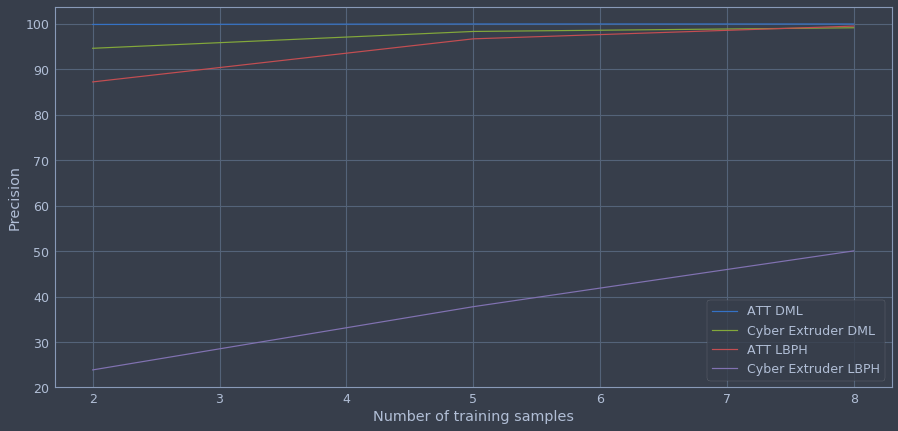

In [15]:
plt.xlabel('Number of training samples')
plt.ylabel('Precision')
plt.plot(samples_subject, att_avg, label="ATT DML")
plt.plot(samples_subject, ceu_avg, label="Cyber Extruder DML")
plt.plot(samples_subject, att_lbph_avg, label="ATT LBPH")
plt.plot(samples_subject, ceu_lbph_avg, label="Cyber Extruder LBPH")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()